In [10]:
import pandas as pd

url = "https://media.geeksforgeeks.org/wp-content/uploads/Wine.csv"
df = pd.read_csv(url)

In [9]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [13]:
target_col = 'Customer_Segment'
y = df[target_col]
X = df.drop(columns=[target_col])

In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
pca = PCA(n_components=0.95, random_state=42)
X_pca = pca.fit_transform(X_scaled)

In [16]:
pc_cols = [f'PC{i+1}' for i in range(X_pca.shape[1])]
df_pca = pd.DataFrame(X_pca, columns=pc_cols)
df_pca['Segment'] = y

In [17]:
print(f"Original features: {X.shape[1]}")
print(f"PCA reduced to   : {X_pca.shape[1]} components")
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Original features: 13
PCA reduced to   : 10 components
Explained Variance Ratio: [0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679 0.02680749 0.02222153 0.01930019]


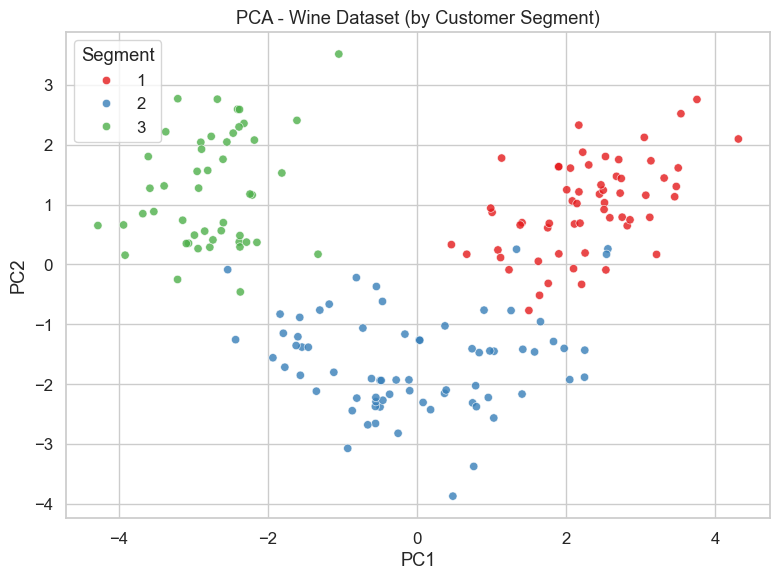

In [18]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df_pca,
    x='PC1', y='PC2',
    hue='Segment',
    palette='Set1',
    alpha=0.8
)
plt.title("PCA - Wine Dataset (by Customer Segment)")
plt.tight_layout()
plt.show()